In [1]:
import numpy as np

In [2]:
aa_units = np.array([[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
                     [1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                     [1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
                     [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                     [1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                     [1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
                     [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1],
                     [1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [1, 0, 1, 3, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                     [1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                     [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                     [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                     [1, 0, 1, 1, 0, 1, 3, 1, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                     [1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                     [1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
aa_order = ['ALA', 'CYS', 'ASP', 'GLU', 'PHE', 'GLY', 'HIS', 'ILE',
            'LYS', 'LEU', 'MET', 'ASN', 'PRO', 'GLN', 'ARG', 'SER',
            'THR', 'VAL', 'TRP', 'TYR']

In [4]:
def parse_hydrophobicity(file):
    
    scores = np.zeros(20)
    
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('!'):
                continue
                
            el = line.split()
            
            if len(el) > 1:
            
                scores[aa_order.index(el[0])] = float(el[1])
            
    return scores

In [5]:
parse_hydrophobicity('./data/argos.hpb')

array([ 1.56,  1.23,  0.14,  0.23,  2.03,  0.62,  0.29,  1.67,  0.15,
        2.93,  2.96,  0.27,  0.76,  0.51,  0.45,  0.81,  0.91,  1.14,
        1.08,  0.68])

In [18]:
def get_coefficients(X, scores):
    return np.linalg.lstsq(X, scores)[0]

In [19]:
from glob import glob

In [20]:
files = glob('data/*hpb')

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
score_results = []
db_names = []

for file in files:
    print('>>> {}'.format(file))
    scores = parse_hydrophobicity(file)
    if sum(scores) == 0:
        print('    NaN')
        score_results.append((0,0))
        db_names.append(file.split('/')[1].split('.')[0])
    else:
        coef = get_coefficients(aa_units, scores)
        pred = np.dot(aa_units, coef)
        print('    {:.4f}'.format(r2_score(scores, pred)))
        score_results.append((r2_score(scores, pred), mean_squared_error(scores, pred) ** 0.5))
        db_names.append(file.split('/')[1].split('.')[0])

>>> data/heijne.hpb
    0.9193
>>> data/prift_N.hpb
    0.9702
>>> data/chothia.hpb
    0.9728
>>> data/cornette.hpb
    0.9697
>>> data/kyte.hpb
    0.9599
>>> data/templ.hpb
    NaN
>>> data/prift.hpb
    0.9701
>>> data/zimmr.hpb
    0.8077
>>> data/wolfenden.hpb
    0.9078
>>> data/janin.hpb
    0.9799
>>> data/argos.hpb
    0.8668
>>> data/hopp.hpb
    0.9064
>>> data/consensus.hpb
    0.9782
>>> data/tanford.hpb
    0.9065
>>> data/jones.hpb
    0.8855


In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib

In [12]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Times New Roman")

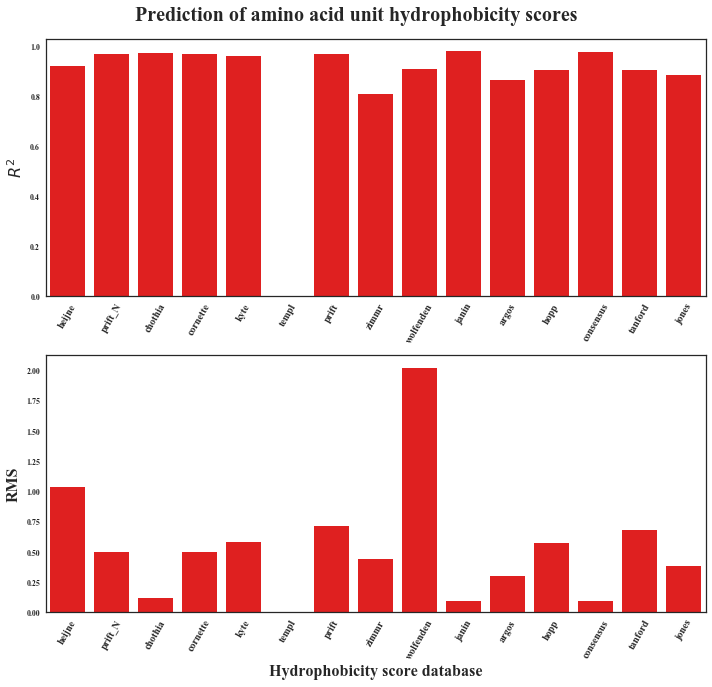

In [13]:
f, ax = plt.subplots(2, 1, figsize=(10,10))

f.suptitle('Prediction of amino acid unit hydrophobicity scores', size = 20)

sns.barplot(list(range(len(score_results))), [x[0] for x in score_results], color='r', ax=ax[0])
ax[0].set_ylabel("$R^2$", size=16)
ax[0].set_xticklabels(db_names, rotation=60, size=10)

sns.barplot(list(range(len(score_results))), [x[1] for x in score_results], color='r', ax=ax[1])
ax[1].set_xlabel('Hydrophobicity score database', size=16)
ax[1].set_ylabel("RMS", size=16)
ax[1].set_xticklabels(db_names, rotation=60, size=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## The consensus seems to be the best predictor!

In [14]:
coef = get_coefficients(aa_units, parse_hydrophobicity('./data/consensus.hpb'))

In [15]:
pred = np.dot(aa_units, coef)

In [16]:
print(' AA    EXPERIMENTAL   PREDICTION\n--------------------------------')
for aa, y_true, y_pred in zip(aa_order, parse_hydrophobicity('./data/consensus.hpb'), pred):
    print('{}  {:>10.2f}  {:>12.2f}'.format(aa, y_true, y_pred))

 AA    EXPERIMENTAL   PREDICTION
--------------------------------
ALA        0.25          0.16
CYS        0.04          0.04
ASP       -0.72         -0.50
GLU       -0.62         -0.73
PHE        0.61          0.61
GLY        0.16         -0.06
HIS       -0.40         -0.29
ILE        0.73          0.77
LYS       -1.10         -1.10
LEU        0.53          0.43
MET        0.26          0.43
ASN       -0.64         -0.64
PRO       -0.07         -0.07
GLN       -0.69         -0.69
ARG       -1.80         -1.80
SER       -0.26         -0.26
THR       -0.18         -0.18
VAL        0.54          0.54
TRP        0.37          0.37
TYR        0.02         -0.01


In [17]:
import pandas as pd

In [18]:
data = pd.DataFrame(data={'Data': np.append(parse_hydrophobicity('./data/consensus.hpb'), pred), 
                          'Type': ['Exp']*20 + ['Pred']*20}, 
                    index=aa_order*2)

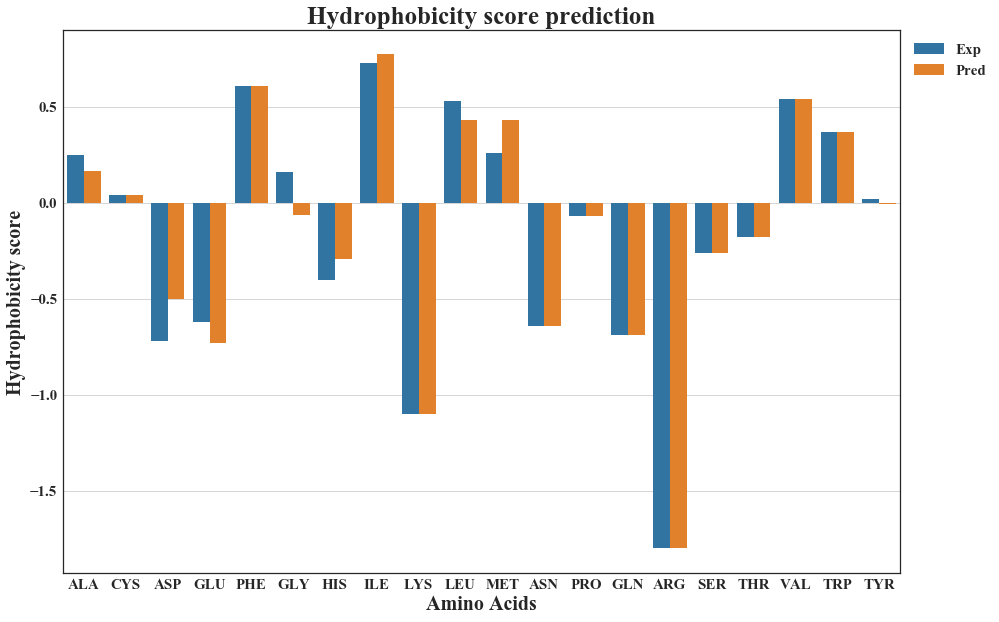

In [19]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    f, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.barplot(x=aa_order*2, y='Data', hue='Type', data=data, ax=ax)
    ax.set_xlabel('Amino Acids')
    ax.set_ylabel('Hydrophobicity score')
    ax.set_title('Hydrophobicity score prediction')
    ax.grid(axis='y')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [20]:
aa_order_1 = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

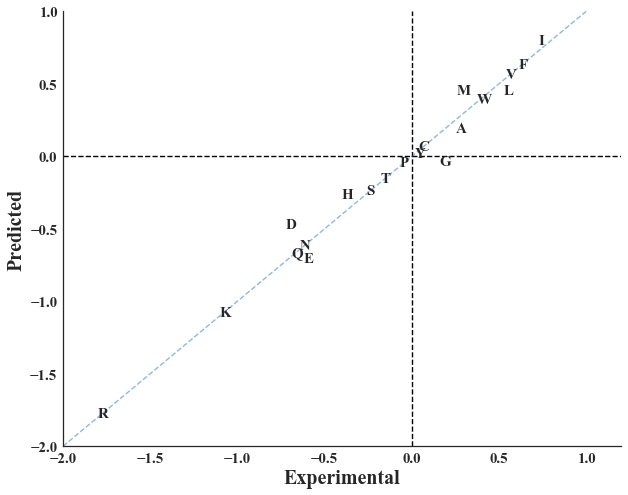

In [28]:
exp=parse_hydrophobicity('./data/consensus.hpb')

with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    f, ax = plt.subplots(1, 1, figsize=(10, 8))

    for x in range(20):
        ax.text(exp[x], pred[x], aa_order_1[x], fontdict={'size': 15})
    sns.despine(ax=ax)
    plt.axhline(0, color='k', linestyle='--')
    plt.axvline(0, color='k', linestyle='--')
    plt.xlim(-2,1.2)
    plt.ylim(-2,1)
    plt.plot([-2,1],[-2,1], linestyle='--', alpha=0.5)
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Experimental')

In [22]:
units = ['NH1a', 'N', 'CH1Ea', 'CH2Ea', 'CH3E', 'C', 'Cb', 'O',
         'CH2Eb', 'CH2Ec', 'CR1E', 'NC2', 'NH2', 'OC', 'S', 'OH1',
         'NH1b', 'CH1Eb', 'NH3', 'NR']

In [23]:
print('AA unit    PREDICTION\n---------------------')
for unit, coef_i in zip(units, coef):
    print('{:>6}  {:>10.2f}'.format(unit, coef_i))

AA unit    PREDICTION
---------------------
  NH1a        2.00
     N       -2.40
 CH1Ea        0.95
 CH2Ea        0.44
  CH3E       -1.12
     C       -1.13
    Cb        0.72
     O       -0.53
 CH2Eb       -1.26
 CH2Ec       -0.18
  CR1E       -0.63
   NC2       -0.86
   NH2       -0.56
    OC       -0.35
     S       -1.11
   OH1       -0.28
  NH1b       -0.21
 CH1Eb       -0.06
   NH3       -1.98
    NR       -2.08


In [24]:
units = ['NH1a', 'N', 'CH1Ea', 'CH2Ea', 'CH3E', 'C', 'Cb', 'O',
         'CH2Eb', 'CH2Ec', 'CR1E', 'NC2', 'NH2', 'OC', 'S', 'OH1',
         'NH1b', 'CH1Eb', 'NH3', 'NR']

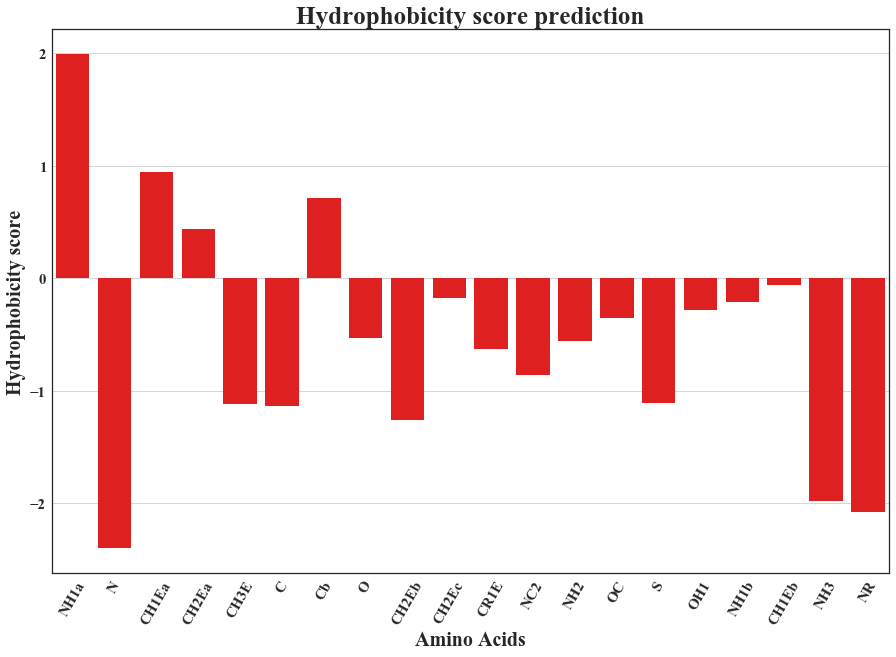

In [25]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    f, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.barplot(x=units, y=coef, ax=ax, color='r')
    ax.set_xticklabels(units, rotation=60)
    ax.set_xlabel('Amino Acids')
    ax.set_ylabel('Hydrophobicity score')
    ax.set_title('Hydrophobicity score prediction')
    ax.grid(axis='y')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")